<a href="https://colab.research.google.com/github/rsudiplive/FluidAI-Data-Science-Hiring-Challenge_Loan-Default-Default-Prediction/blob/main/Fluid_AI_Data_Science_Hiring_Submission_Sudip_Roy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task is simple. We have data of a banks loan customers. Your task is to build a model which will be able to accurately identify which customers will default based on the customers data.

In this case the below table has a column called **TARGET**. Thats the variable which tells you if the customer defaulted or not. 1 means defaulter and 0 means non-defaulter.

Importing the soldiers in the battle!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_curve, roc_auc_score, confusion_matrix

In [ ]:
url = "https://fluidai-public-share.s3.ap-south-1.amazonaws.com/data_set_short.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['TARGET'].value_counts()

0    55345
1     4828
Name: TARGET, dtype: int64

In [ ]:
df.shape #checking the shape of the dataframe!

(60173, 122)

The dataset contains 60173 rows with 122 features having one dependent variable 'TARGET' indicating weather a customer will default on a loan or not.

## Data Exploration & Variable Identification:

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60173 entries, 0 to 60172
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 56.0+ MB


In [ ]:
df.describe() #checking summary statitics

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,60173.000000,60173.000000,60173.000000,6.017300e+04,6.017300e+04,60168.000000,6.012700e+04,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,20469.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60172.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,26226.000000,6.002900e+04,48259.000000,29642.000000,25032.000000,30811.000000,20183.000000,18147.000000,28101.000000,29865.000000,30240.000000,...,29865.000000,30240.000000,19384.000000,24448.000000,19017.000000,29935.000000,18415.000000,27012.000000,31111.000000,59976.000000,59976.000000,59976.000000,59976.000000,60172.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,52120.000000,52120.000000,52120.000000,52120.000000,52120.000000,52120.000000
mean,134898.791401,0.080235,0.420255,1.700445e+05,5.998655e+05,27086.380884,5.390792e+05,0.020866,-16024.267927,62912.403154,-4980.915028,-2995.493394,12.004837,0.999983,0.822296,0.199807,0.998022,0.278331,0.055556,2.158413,2.051867,2.031193,12.052765,0.015140,0.050288,0.039785,0.079969,0.231765,0.179167,0.502711,5.141413e-01,0.511372,0.117641,0.088978,0.978039,0.751629,0.044978,0.078794,0.150194,0.225877,...,0.149647,0.225505,0.231735,0.067121,0.101722,0.108741,0.009014,0.028079,0.102714,1.423469,0.141973,1.406629,0.098523,-962.103653,0.000033,0.711848,0.000166,0.015638,0.086218,0.000199,0.081066,0.003623,0.000017,0.004205,0.000017,0.003274,0.003108,0.000897,0.010088,0.000283,0.008392,0.000681,0.000482,0.000349,0.007080,0.007809,0.033346,0.270683,0.262068,1.881754
std,20092.197186,0.271659,0.725420,4.863248e+05,4.030292e+05,14526.868318,3.702773e+05,0.013794,4360.847914,140538.969253,3526.315074,1510.735814,11.828171,0.004077,0.382267,0.399859,0.044427,0.448181,0.229065,0.913067,0.508799,0.502808,3.258367,0.122109,0.218541,0.195456,0.271248,0.421963,0.383495,0.211469,1.911863e-01,0.194747,0.108414,0.082986,0.056295,0.113482,0.078160,0.134261,0.100400,0.145299,...,0.100734,0.145734,0.162360,0.080318,0.094125,0.112304,0.049852,0.069626,0.107838,2.302438,0.440207,2.282328,0.356137,829.261894,0.005765,0.452906,0.012890,0.124072,0.280688,0.014121,0.272939,0.060082,0.004077,0.064707,0.004077,0.057125,0.055661,0.029944,0.099930,0.016806,0.091226,0.026094,0.021948,0.018678,0.088

In [ ]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['NAME_CONTRACT_TYPE'].value_counts() #contract_types

Cash loans         54457
Revolving loans     5716
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
df['CODE_GENDER'].value_counts() #Gender

F      39535
M      20636
XNA        2
Name: CODE_GENDER, dtype: int64

In [ ]:
df['NAME_INCOME_TYPE'].value_counts() #income_type

Working                 31203
Commercial associate    14008
Pensioner               10686
State servant            4261
Unemployed                  6
Student                     6
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts() #family status

Married                 38570
Single / not married     8784
Civil marriage           5846
Separated                3840
Widow                    3132
Unknown                     1
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
df['NAME_HOUSING_TYPE'].value_counts() #housing type

House / apartment      53427
With parents            2902
Municipal apartment     2197
Rented apartment         929
Office apartment         503
Co-op apartment          215
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
df['OCCUPATION_TYPE'].value_counts() #occupation type

Laborers                 10810
Sales staff               6269
Core staff                5373
Managers                  4178
Drivers                   3656
High skill tech staff     2197
Accountants               1943
Medicine staff            1687
Security staff            1353
Cooking staff             1173
Cleaning staff             878
Private service staff      531
Low-skill Laborers         422
Waiters/barmen staff       265
Secretaries                252
Realty agents              146
HR staff                   116
IT staff                   100
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
#check for number of missing values
df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     8053
AMT_REQ_CREDIT_BUREAU_WEEK    8053
AMT_REQ_CREDIT_BUREAU_MON     8053
AMT_REQ_CREDIT_BUREAU_QRT     8053
AMT_REQ_CREDIT_BUREAU_YEAR    8053
Length: 122, dtype: int64

In [ ]:
df[df.isnull()].columns 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# Checking missing values in the table
total = df.isnull().sum().sort_values(ascending=False)
missing = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
missing_percent  = pd.concat([total, missing], axis=1, keys=["Total", "Missing (%)"])
missing_percent.head(10)

,Total,Missing (%)
COMMONAREA_MEDI,42026,69.841956
COMMONAREA_AVG,42026,69.841956
COMMONAREA_MODE,42026,69.841956
NONLIVINGAPARTMENTS_MODE,41758,69.396573
NONLIVINGAPARTMENTS_MEDI,41758,69.396573
NONLIVINGAPARTMENTS_AVG,41758,69.396573
LIVINGAPARTMENTS_MEDI,41156,68.396125
LIVINGAPARTMENTS_MODE,41156,68.396125
LIVINGAPARTMENTS_AVG,41156,68.396125
FONDKAPREMONT_MODE,41094,68.293088


There are a lot of missing values and if we were to drop all the missing values, we might loose info. So, let's not remove them as of now.

### Feature Engineering:

In [ ]:
def flag_label(col):
  map = {'Y': 1, 'N':0}
  if col in map.keys():
    value=map[col]
  return value

In [ ]:
df['FLAG_OWN_CAR']=df['FLAG_OWN_CAR'].apply(lambda x: flag_label(x))
df['FLAG_OWN_REALTY']=df['FLAG_OWN_REALTY'].apply(lambda x: flag_label(x))

In [ ]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.CODE_GENDER.isnull().sum()

0

Few of the features like: 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' are having negetive values. We'll fix those by writing a simple function.

In [ ]:
# A function to fix negetive representation
def convert_neg(negative):
    positive = -negative
    pos_years = positive/365
    return pos_years

In [ ]:
# Applying convert_neg() function to to the data frame
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(convert_neg)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(convert_neg)
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(convert_neg)
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(convert_neg)

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,6.017300e+04,6.017300e+04,60168.000000,6.012700e+04,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,20469.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60172.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,26226.000000,6.002900e+04,48259.000000,29642.000000,25032.000000,30811.000000,20183.000000,18147.000000,28101.000000,...,29865.000000,30240.000000,19384.000000,24448.000000,19017.000000,29935.000000,18415.000000,27012.000000,31111.000000,59976.000000,59976.000000,59976.000000,59976.000000,60172.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,60173.000000,52120.000000,52120.000000,52120.000000,52120.000000,52120.000000,52120.000000
mean,134898.791401,0.080235,0.340186,0.694232,0.420255,1.700445e+05,5.998655e+05,27086.380884,5.390792e+05,0.020866,43.902104,-172.362748,13.646343,8.206831,12.004837,0.999983,0.822296,0.199807,0.998022,0.278331,0.055556,2.158413,2.051867,2.031193,12.052765,0.015140,0.050288,0.039785,0.079969,0.231765,0.179167,0.502711,5.141413e-01,0.511372,0.117641,0.088978,0.978039,0.751629,0.044978,0.078794,...,0.149647,0.225505,0.231735,0.067121,0.101722,0.108741,0.009014,0.028079,0.102714,1.423469,0.141973,1.406629,0.098523,-962.103653,0.000033,0.711848,0.000166,0.015638,0.086218,0.000199,0.081066,0.003623,0.000017,0.004205,0.000017,0.003274,0.003108,0.000897,0.010088,0.000283,0.008392,0.000681,0.000482,0.000349,0.007080,0.007809,0.033346,0.270683,0.262068,1.881754
std,20092.197186,0.271659,0.473775,0.460736,0.725420,4.863248e+05,4.030292e+05,14526.868318,3.702773e+05,0.013794,11.947529,385.038272,9.661137,4.139002,11.828171,0.004077,0.382267,0.399859,0.044427,0.448181,0.229065,0.913067,0.508799,0.502808,3.258367,0.122109,0.218541,0.195456,0.271248,0.421963,0.383495,0.211469,1.911863e-01,0.194747,0.108414,0.082986,0.056295,0.113482,0.078160,0.134261,...,0.100734,0.145734,0.162360,0.080318,0.094125,0.112304,0.049852,0.069626,0.107838,2.302438,0.440207,2.282328,0.356137,829.261894,0.005765,0.452906,0.012890,0.124072,0.280688,0.014121,0.272939,0.060082,0.004077,0.064707,0.004077,0.057125,0.055661,0.029944,0.099930,0.016806,0.091226,0.026094,0.021948,0.018678,0.088519,0.113027,0.201400,

In [ ]:
#checking for duplicate records if present:

duplicate_data = df.duplicated()
print(duplicate_data.sum())
df[duplicate_data]
#looks like there's no duplicate data present!

0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


### Data Cleaning: Outlier Treatment & Missing values:

Text(0.5, 0, 'Days Employment')

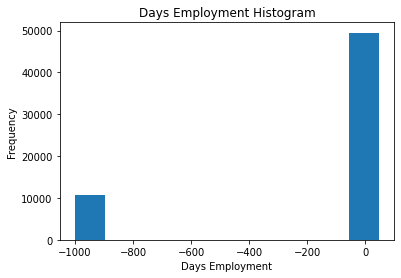

In [ ]:
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

Looks like it has negetive outliers surrounded with a value of -1000. It's obvious that a person's days employed cant be negetive 1000s. We'll set a threshold and remove them.

In [ ]:
df1=df.copy()

Going with the IQR approach for handling outliers

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SK_ID_CURR                    34709.0
TARGET                            0.0
FLAG_OWN_CAR                      1.0
FLAG_OWN_REALTY                   1.0
CNT_CHILDREN                      1.0
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY         0.0
AMT_REQ_CREDIT_BUREAU_WEEK        0.0
AMT_REQ_CREDIT_BUREAU_MON         0.0
AMT_REQ_CREDIT_BUREAU_QRT         0.0
AMT_REQ_CREDIT_BUREAU_YEAR        3.0
Length: 108, dtype: float64


In [ ]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df1['DAYS_EMPLOYED'])

In [ ]:
df1_new = df1[(df1.DAYS_EMPLOYED>lower_bound) & (df1.DAYS_EMPLOYED<upper_bound)]

In [ ]:
df1_new.DAYS_EMPLOYED.describe()

count    46144.000000
mean         5.273835
std          4.148785
min          0.000000
25%          1.961644
50%          4.150685
75%          7.731507
max         17.947945
Name: DAYS_EMPLOYED, dtype: float64

**Let's check the distribution for 'DAYS EMPLOYED' now:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


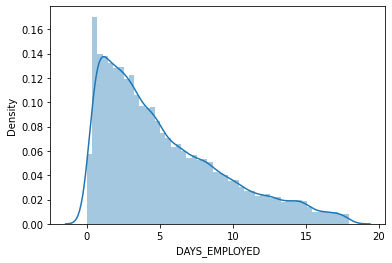

In [ ]:
sns.distplot(df1_new['DAYS_EMPLOYED'])

The distribution now looks better instead of clinging to a negetive outlier value. But, its not a gaussian distribution and is positively skewed. So, we are good to apply normalization on train & test data.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df1_new['DAYS_EMPLOYED'].skew())
print("Kurtosis: %f" % df1_new['DAYS_EMPLOYED'].kurt())

Skewness: 0.958125
Kurtosis: 0.154962


A skewness value between the range 0.5 & 1 is moderately skewed distribution and the kurtosis is also low which is caused by the process that directly leads to high peaks than  fat tails. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


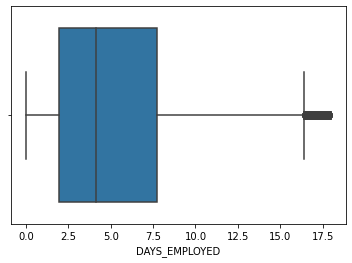

In [ ]:
sns.boxplot(df1_new['DAYS_EMPLOYED'])

From the box-plot we can clearly visualize that we've successfuly removed the high-range outliers from the feature 'DAYS_EMPLOYED'.

### Univariate Analysis:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


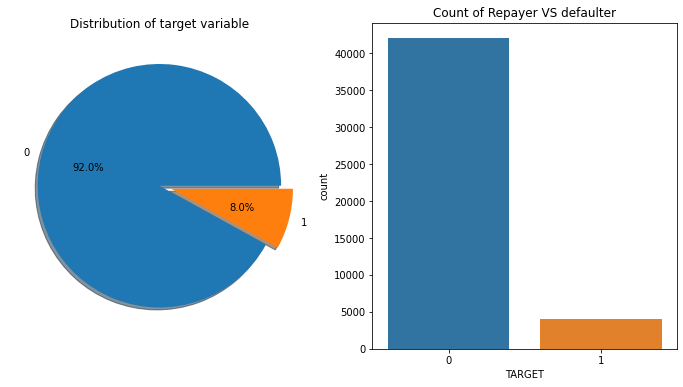

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')
sns.countplot('TARGET',data=df1_new,ax=ax[1])
ax[1].set_title('Count of Repayer VS defaulter')
plt.show()

It is evident that many customer are able to pay the loan back i.e Only 92% of the total customer are repaying the loan back. While 8% of the customer are unable to repay!

**Who is the highest borrower? Male or Female?**

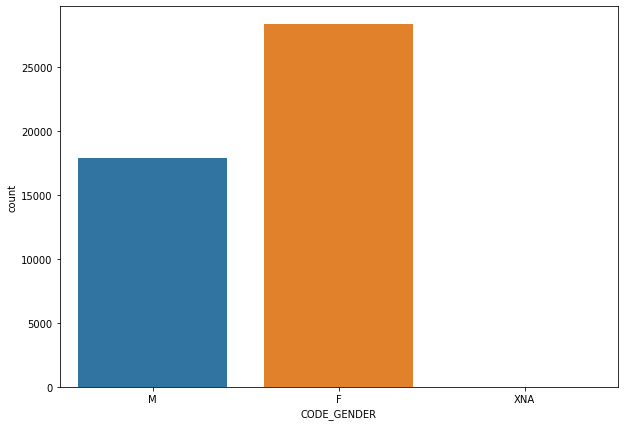

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=df1_new)

**Females** holds the highest counts as borrowers.

Let's now understand who faces the problem in repaying the loan back? Is it Male/female?

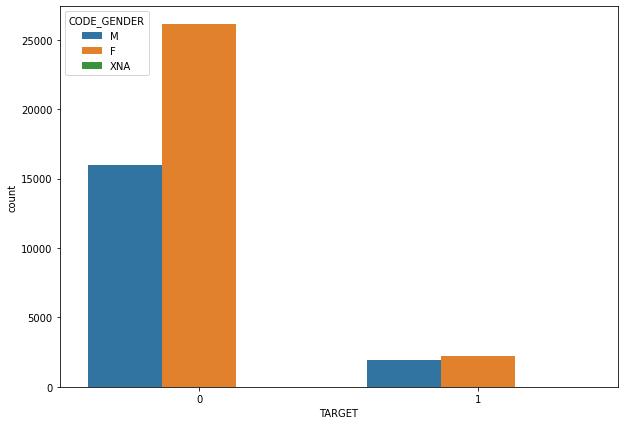

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df1_new)

Looking at this we are clear that **Females** faces the **problem of repaying the loan amount back** as compared to Males.

**Borrowers & their occupancy type with their chances of repaying the loan back:**

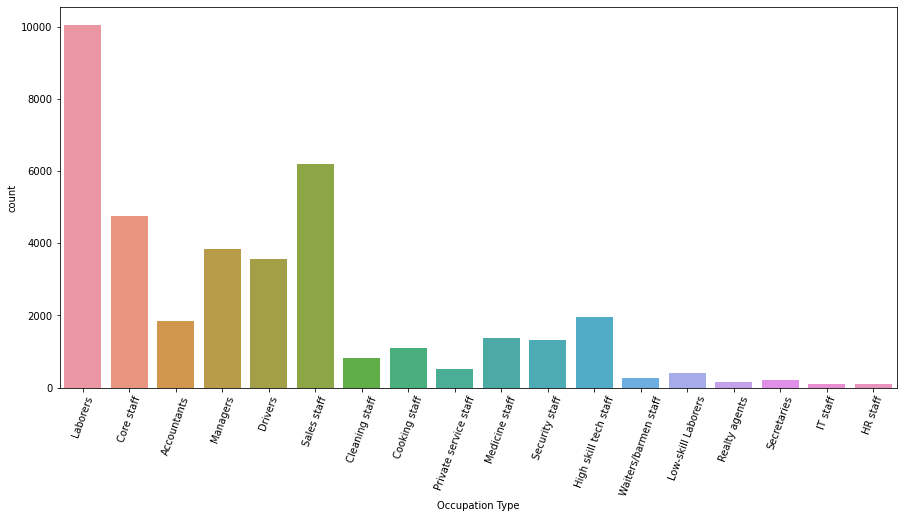

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=df1_new)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)
plt.show()

Occupation type with **Labourers** seems to have borrowed the most no of loans followed by **Sales staff**.

### Multivariate Analysis:

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

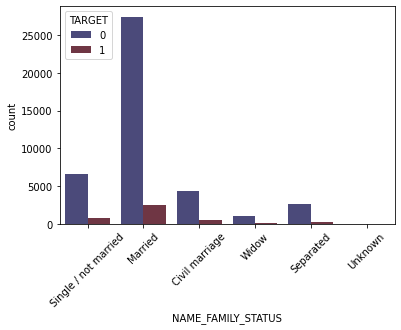

In [ ]:
sns.countplot(x="NAME_FAMILY_STATUS", hue="TARGET", data=df1_new, palette="icefire")
plt.xticks(rotation=45)

Mostly **Married couples** are on default list having the highest numbers for not repaying the loan back & also they are the one's who are able to pay their loans back than the other classes of family.

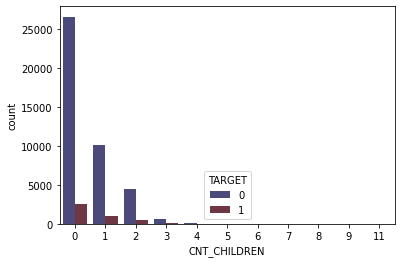

In [ ]:
sns.countplot(x="CNT_CHILDREN", hue="TARGET", data=df1_new, palette="icefire")
plt.xticks()
plt.show()

The families with no children has the highest counts of repaying the loan back. Families with more than 3 children are most likely facing problems to pay their loans back.

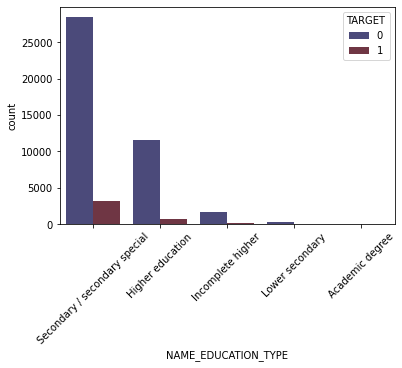

In [ ]:
sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET", data=df1_new, palette="icefire")
plt.xticks(rotation=45)
plt.show()

Families with status as Secondary/secondary special & higher education are mostly paying their loans as they are not in the defaulter's regime.

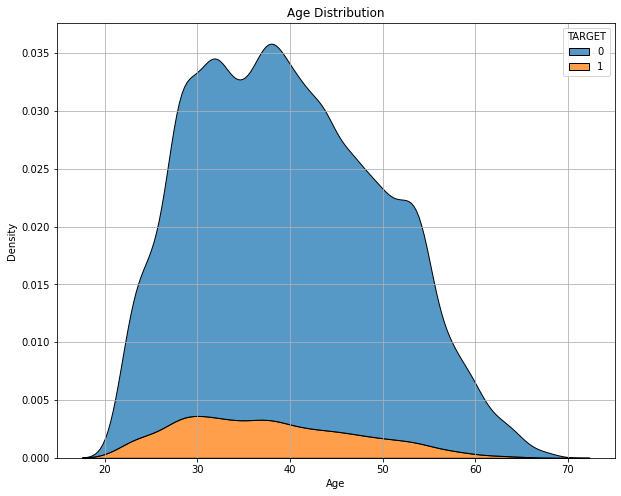

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Age Distribution')
plt.xlabel('Age')
sns.kdeplot(data=df1_new, x="DAYS_BIRTH", hue="TARGET", multiple="stack")
plt.grid()
plt.show()

From the KDE graph we can clearly visualize and say that **younger people has more difficulty** than the older ones in **repaying the loan back**.

Text(0, 0.5, 'Average Annual family income')

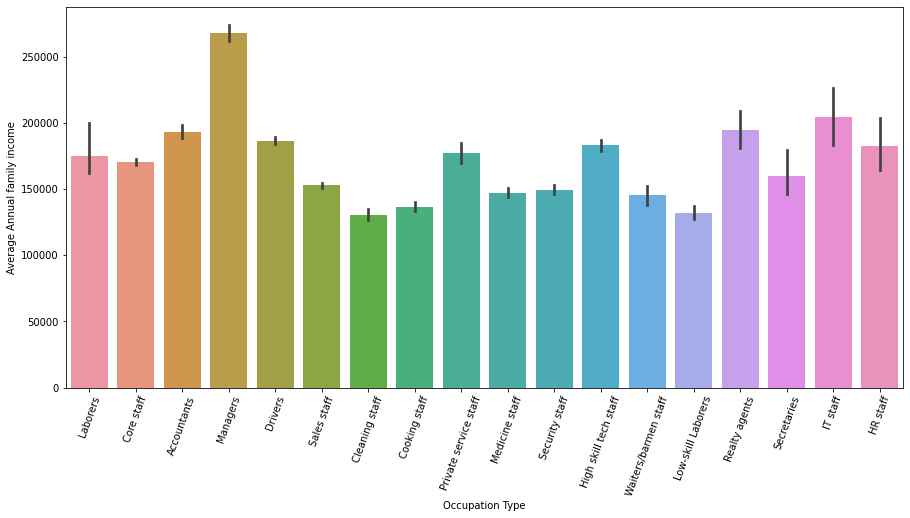

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=df1_new)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

Borrowers with Occupation type as: **Managers** are more likely having higher avg income followed by **IT/HR staff** & **Realty agents**.

In [ ]:
df1_new.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


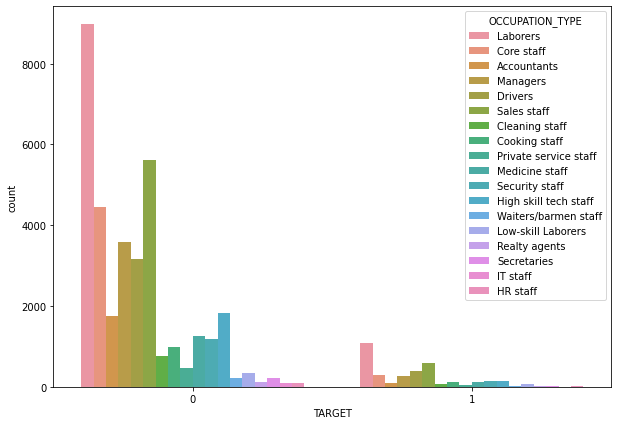

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='TARGET',hue='OCCUPATION_TYPE',data=df1_new)

Looking at this count plot we can clearly say that **IT/HR staff, Secretaries, accountants** are safe for santioning loans. Also, **Managers, Drivers, sales staff** are likely to be safe for giving loans.

In [ ]:
df1_new.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Features that we are going to use to train the model
used_features = [
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

In [ ]:
# Create a new data frame which only consists of those selected columns
reduced_df = df1_new[used_features]

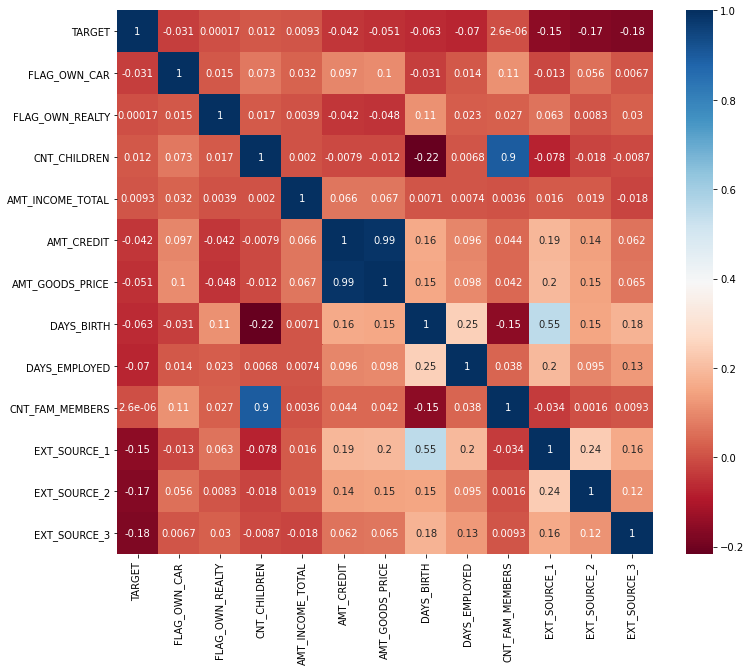

In [ ]:
# Displaying correlation matrix based on reduced_df
plt.figure(figsize=(12,10))
sns.heatmap(reduced_df.corr(), annot=True, cmap='RdBu') #heatmap

CNT_CHILDREN & CNT_FAM_MEMBERS exhibits strong collinearly with each other. Similarly, (CNT_CHILDREN & DAYS_BIRTH) ~strong negetive and (CNT_FAM_MEMBERS & DAYS_BIRTH)shows a negetive correlation with each other. All the EXT_SOURCE_1, EXT_SOURCE_2,EXT_SOURCE_3 shows strong negetive correlation with TARGET(dependent variable). Also, DAYS_EMPLOYED, DAYS_BIRTH, AMT_GOODS_PRICE, AMT_CREDIT is correlated with dependent variable 'TARGET'.  

### Model Preparation & Building:

In [ ]:
# A function to convert categorical data into one-hot representation (more than 2 categories)
columns = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

In [ ]:
def create_one_hot(reduced_df, columns):
    for column in columns:
        reduced_df = pd.concat([reduced_df, pd.get_dummies(df[column])], axis=1, join='inner')
        reduced_df = reduced_df.drop([column], axis=1)
    
    return reduced_df

In [ ]:
reduced_df = create_one_hot(reduced_df, columns)

In [ ]:
reduced_df.head()

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,F,M,XNA,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
0,1,Cash loans,0,1,0,202500.0,406597.5,351000.0,25.920548,1.745205,1.0,0.083037,0.262949,0.139376,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,Cash loans,0,0,0,270000.0,1293502.5,1129500.0,45.931507,3.254795,2.0,0.311267,0.622246,NaN,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,Revolving loans,1,1,0,67500.0,135000.0,135000.0,52.180822,0.616438,1.0,NaN,0.555912,0.729567,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,Cash loans,0,1,0,135000.0,312682.5,297000.0,52.068493,8.326027,2.0,NaN,0.650442,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,Cash loans,0,1,0,121500.0,513000.0,513000.0,54.608219,8.323288,1.0,NaN,0.322738,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


**Label Encoding:**

In [ ]:
# Using label encoder to encode columns which consists of only 2 categories
le_name_contract_type = LabelEncoder()
reduced_df['NAME_CONTRACT_TYPE'] = le_name_contract_type.fit_transform(reduced_df['NAME_CONTRACT_TYPE'])

le_flag_own_car = LabelEncoder()
reduced_df['FLAG_OWN_CAR'] = le_flag_own_car.fit_transform(reduced_df['FLAG_OWN_CAR'])

le_flag_own_realty = LabelEncoder()
reduced_df['FLAG_OWN_REALTY'] = le_flag_own_realty.fit_transform(reduced_df['FLAG_OWN_REALTY'])

In [ ]:
reduced_df.isnull().sum() #missing values

TARGET                               0
NAME_CONTRACT_TYPE                   0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_GOODS_PRICE                     40
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
CNT_FAM_MEMBERS                      1
EXT_SOURCE_1                     23621
EXT_SOURCE_2                       105
EXT_SOURCE_3                      9297
F                                    0
M                                    0
XNA                                  0
Businessman                          0
Commercial associate                 0
Maternity leave                      0
Pensioner                            0
State servant                        0
Student                              0
Unemployed                           0
Working                              0
Academic degree          

In [ ]:
# Filling missing values with the mean of the corresponding column
reduced_df.loc[:,'AMT_GOODS_PRICE'] = reduced_df['AMT_GOODS_PRICE'].fillna(reduced_df['AMT_GOODS_PRICE'].mean())
reduced_df.loc[:,'CNT_FAM_MEMBERS'] = reduced_df['CNT_FAM_MEMBERS'].fillna(reduced_df['CNT_FAM_MEMBERS'].mean())
reduced_df.loc[:,'EXT_SOURCE_1'] = reduced_df['EXT_SOURCE_1'].fillna(reduced_df['EXT_SOURCE_1'].mean())
reduced_df.loc[:,'EXT_SOURCE_2'] = reduced_df['EXT_SOURCE_2'].fillna(reduced_df['EXT_SOURCE_2'].mean())
reduced_df.loc[:,'EXT_SOURCE_3'] = reduced_df['EXT_SOURCE_3'].fillna(reduced_df['EXT_SOURCE_3'].mean())

In [ ]:
# Split the data into train/test
X = reduced_df.iloc[:,1:].values #choosing all the independent variables apart from the dependent variable.
y = reduced_df['TARGET'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

**Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution:

In [ ]:
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

In [ ]:
# Initializing LightGBM classifier
model_light = lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=22)

In [ ]:
# Training the LightGBM model
model_light.fit(X_train_scaled, y_train, eval_metric='auc',eval_set=[(X_train_scaled, y_train),(X_test_scaled, y_test)])

[1]	training's binary_logloss: 0.677661	training's auc: 0.731349	valid_1's binary_logloss: 0.673592	valid_1's auc: 0.683501
[2]	training's binary_logloss: 0.665168	training's auc: 0.737994	valid_1's binary_logloss: 0.656842	valid_1's auc: 0.700593
[3]	training's binary_logloss: 0.654091	training's auc: 0.745452	valid_1's binary_logloss: 0.640381	valid_1's auc: 0.701814
[4]	training's binary_logloss: 0.645113	training's auc: 0.7484	valid_1's binary_logloss: 0.629491	valid_1's auc: 0.707456
[5]	training's binary_logloss: 0.637011	training's auc: 0.751144	valid_1's binary_logloss: 0.62041	valid_1's auc: 0.709959
[6]	training's binary_logloss: 0.629918	training's auc: 0.75499	valid_1's binary_logloss: 0.612044	valid_1's auc: 0.712099
[7]	training's binary_logloss: 0.623045	training's auc: 0.758731	valid_1's binary_logloss: 0.601987	valid_1's auc: 0.714114
[8]	training's binary_logloss: 0.617359	training's auc: 0.761434	valid_1's binary_logloss: 0.595763	valid_1's auc: 0.715787
[9]	training

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=22, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
# Predict the probability score
prob_train = model_light.predict_proba(X_train_scaled)
prob_test = model_light.predict_proba(X_test_scaled)

**predict_proba() is used to predict the class probabilities**

In [ ]:
prob_train
#depicting probabilities of 0(negetive) & 1(positive) classes respectively

array([[0.83279368, 0.16720632],
       [0.66726391, 0.33273609],
       [0.81609378, 0.18390622],
       ...,
       [0.62910401, 0.37089599],
       [0.71454238, 0.28545762],
       [0.84408679, 0.15591321]])

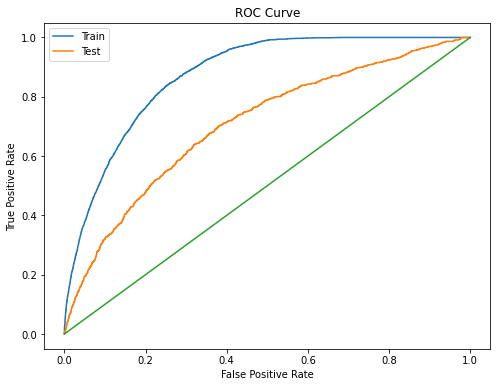

In [ ]:
# Create train and test curve
fpr_train, tpr_train, thresh_train = roc_curve(y_train, prob_train[:,1])
fpr_test, tpr_test, thresh_test = roc_curve(y_test, prob_test[:,1])

"""ROC score is calculated based on the positive probablity class which
    is at the index 1 of the prob_train and prob_test respectively"""

# Create the straight line (how the graph looks like if the model does random guess instead)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

# Plot the ROC graph
plt.figure(figsize=(8,6))
plt.title('ROC Curve')
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot(p_fpr, p_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

The above ROC curve depicting the train & the test score clearly states that the training accuracy(0.873) is higher as compared to test/validation score. This also clearly represents the ROC space for both the train and test data qualifies to be a good classifier.

In [ ]:
# Calculating the train and test AUC score
auc_score_train = roc_auc_score(y_train, prob_train[:,1])
auc_score_test = roc_auc_score(y_test, prob_test[:,1])

print(auc_score_train)
print(auc_score_test)

0.873779389099496
0.706108581851445


The **lightGBM model** has performed well with AUC scores for both train and test near to the 1 which means it has a good measure of separability.

In [ ]:
# Predict train and test data
pred_train = model_light.predict(X_train_scaled)
pred_test = model_light.predict(X_test_scaled)

# Constructing the confusion matrix based on train data
cm_train = confusion_matrix(y_train, pred_train)

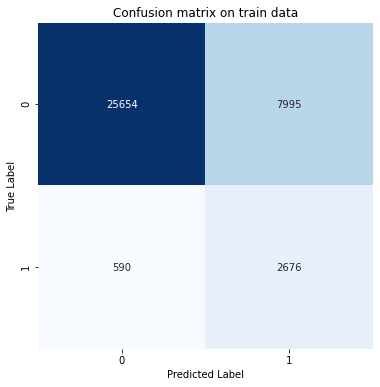

In [ ]:
# Display the train confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm_train, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

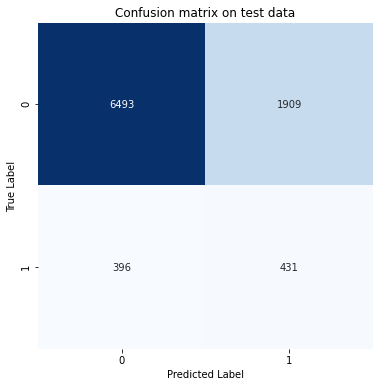

In [ ]:
# Constructing the confusion matrix based on test data
cm_test = confusion_matrix(y_test, pred_test)

# Display the test confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm_test, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Looking at the confusion matrix for both train and test data, we can clearly get a clear picture that the model has also performed well in predicting both the classes from the actual class. 

In [ ]:
#cheking the predictions on the test set which the model haven't seen before!
y_pred_light = model_light.predict(X_test_scaled)

In [ ]:
print("The accuracy: ", accuracy_score(y_test,y_pred_light))
print("\n")
print("The classification report:\n", classification_report(y_test,y_pred_light))
print("ROC AUC score: ",roc_auc_score(y_test,y_pred_light))

The accuracy:  0.7502437967277061


The classification report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85      8402
           1       0.18      0.52      0.27       827

    accuracy                           0.75      9229
   macro avg       0.56      0.65      0.56      9229
weighted avg       0.87      0.75      0.80      9229

ROC AUC score:  0.6469765072921256


The LightGBM model performed well with an accuracy of 75% and also did well on the test data and making predictions on both the classes. 

### Using other Baseline Models for evaluation:

**Logistic Regression:**

In [ ]:
logistic_regressor_clf = LogisticRegression(C = 2)

In [ ]:
logistic_regressor_clf.fit(X_train_scaled,y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_regression_pred = logistic_regressor_clf.predict(X_test_scaled)

In [ ]:
print("The accuracy: ", accuracy_score(y_test,log_regression_pred))
print("\n")
print("The classification report:\n", classification_report(y_test,log_regression_pred))
print("ROC AUC score: ",roc_auc_score(y_test,log_regression_pred))

The accuracy:  0.9101744501029364


The classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      8402
           1       0.44      0.01      0.02       827

    accuracy                           0.91      9229
   macro avg       0.67      0.50      0.48      9229
weighted avg       0.87      0.91      0.87      9229

ROC AUC score:  0.5036965776847627


The accuracy for the **Logistic regression model** ~91% is higher than LightGBM, but on a lighter note the f1-score for class 1 is relatively lesser than class 0 which is around 2%. Also the precision and recall values for the class 1 target label is relatively low as compared to the class 0(not defaulter) label. Hence, the logistic regression model can very well predict the non-defaulter while it fails to predict in a defaulter case. The ROC-AUC score is relatively low.

**Random Forest:**

In [ ]:
model_random_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)
model_random_forest.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   25.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [ ]:
random_forest_pred = model_random_forest.predict(X_test_scaled)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.7s finished


In [ ]:
print("The accuracy: ", accuracy_score(y_test,random_forest_pred))
print("\n")
print("The classification report:\n", classification_report(y_test,random_forest_pred))
print("ROC AUC score: ",roc_auc_score(y_test,random_forest_pred))

The accuracy:  0.9100660960017337


The classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      8402
           1       0.40      0.01      0.01       827

    accuracy                           0.91      9229
   macro avg       0.66      0.50      0.48      9229
weighted avg       0.87      0.91      0.87      9229

ROC AUC score:  0.50309198276336


**XGBOOST:**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_classifier = XGBClassifier(n_estimators=250,max_depth=5)

In [ ]:
xgb_classifier.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_pred = xgb_classifier.predict(X_test_scaled)

In [ ]:
print("The accuracy: ", accuracy_score(y_test,xgb_pred))
print("\n")
print("The classification report:\n", classification_report(y_test,xgb_pred))
print("ROC AUC score: ",roc_auc_score(y_test,xgb_pred))

The accuracy:  0.9033481417271644


The classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      8402
           1       0.31      0.06      0.11       827

    accuracy                           0.90      9229
   macro avg       0.61      0.53      0.53      9229
weighted avg       0.86      0.90      0.87      9229

ROC AUC score:  0.525021393248052


Both the accuracy which is around 90% and the AUC score is fair enough for also making XGBOOST a good model. 

### **Let's try some sampling techniques for handling imbalance and then applying baseline models on top of it and checking the performance**

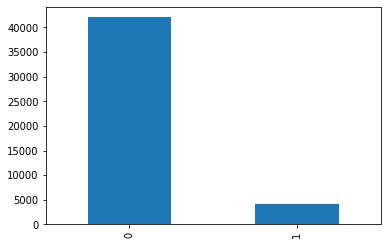

In [ ]:
df1_new['TARGET'].value_counts().plot(kind='bar')

As it is clearly visualized from the bar graph above, that the dataset is imbalanced with majority class as 0(not defaulter) and minority as 1(defaulter~ not able to pay back the loan)

Let's apply **SMOTE**(Synthetic Minority Oversampling Technique) <br>

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X_train,y_train)
print('Original dataset shape', len(df1_new))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 46144
Resampled dataset shape 67298


In [ ]:
print("Label 1, After using SMOTE: {}".format(sum(y_smote==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_smote==0)))

Label 1, After using SMOTE: 33649
Label 0, After using SMOTE: 33649


**Implementing SMOTE with other models and checking the best model:**

### Logistic Regression + SMOTE:

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(x_smote,y_smote)
y_pred_lr = clf_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf_lr = confusion_matrix(y_test, y_pred_lr)
clf_report_lr = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression : {acc_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

Accuracy Score of Logistic Regression : 0.6066746126340882
Confusion Matrix : 
[[5221 3181]
 [ 449  378]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      8402
           1       0.11      0.46      0.17       827

    accuracy                           0.61      9229
   macro avg       0.51      0.54      0.46      9229
weighted avg       0.85      0.61      0.69      9229



In [ ]:
auc_score=roc_auc_score(y_test, y_pred_lr)
print('AUC =' ,auc_score)

AUC = 0.539236713663212


The logistic Regression model with SMOTE didn't do well as compared to the simple baseline logistic regression model. Let's try other models with SMOTE techniques and check the evaluation metrics.

### Random forest+SMOTE:

In [ ]:
random_clf = RandomForestClassifier()
random_clf.fit(x_smote, y_smote)
y_pred_random_clf = random_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_random_clf)
conf = confusion_matrix(y_test, y_pred_random_clf)
clf_report = classification_report(y_test, y_pred_random_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.90833243038249
Confusion Matrix : 
[[8366   36]
 [ 810   17]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8402
           1       0.32      0.02      0.04       827

    accuracy                           0.91      9229
   macro avg       0.62      0.51      0.50      9229
weighted avg       0.86      0.91      0.87      9229



In [ ]:
auc_score=roc_auc_score(y_test, y_pred_random_clf)
print('AUC =' ,auc_score)

AUC = 0.5081357666036215


The Random Forest model with SMOTE, is having slighly less accuracy as the baseline RF model with an accuracy of 91%.

### XG Boost + SMOTE:

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(x_smote, y_smote)

# predict
xgb_y_predict = xgb_model.predict(X_test)

print('ROCAUC score:', roc_auc_score(y_test, xgb_y_predict))
print('Accuracy score:', accuracy_score(y_test, xgb_y_predict))

ROCAUC score: 0.5024873878419573
Accuracy score: 0.9099577419005309


Similaryly for XGBOOST model with SMOTE, the model replied with almost same accuracy as the baseline XGBOOST model but the later had larger ROC-AUC score.

In [ ]:
acc_xgb = accuracy_score(y_test, xgb_y_predict)
conf_xgb = confusion_matrix(y_test, xgb_y_predict)
clf_report_xgb = classification_report(y_test, xgb_y_predict)

print(f"Accuracy Score of XGBOOST +SMOTE is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

Accuracy Score of XGBOOST +SMOTE is : 0.9099577419005309
Confusion Matrix : 
[[8393    9]
 [ 822    5]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8402
           1       0.36      0.01      0.01       827

    accuracy                           0.91      9229
   macro avg       0.63      0.50      0.48      9229
weighted avg       0.86      0.91      0.87      9229



In [ ]:
#auc score:
auc_score=roc_auc_score(y_test, xgb_y_predict)
print('AUC =' ,auc_score)

AUC = 0.5024873878419573


### AdaBoost + SMOTE

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_smote,y_smote)
y_pred_ab= ada_model.predict(X_test)

acc_ab = accuracy_score(y_test, y_pred_ab)
conf_ab = confusion_matrix(y_test, y_pred_ab)
clf_report_ab = classification_report(y_test, y_pred_ab)

print(f"Accuracy Score of Adaboost classifier is : {acc_ab}")
print(f"Confusion Matrix : \n{conf_ab}")
print(f"Classification Report : \n{clf_report_ab}")

Accuracy Score of Adaboost classifier is : 0.8982554989706361
Confusion Matrix : 
[[8241  161]
 [ 778   49]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8402
           1       0.23      0.06      0.09       827

    accuracy                           0.90      9229
   macro avg       0.57      0.52      0.52      9229
weighted avg       0.85      0.90      0.87      9229



In [ ]:
#auc score:
auc_score=roc_auc_score(y_test, y_pred_ab)
print('AUC =' ,auc_score)

AUC = 0.5200440990182852


Adaboost with SMOTE can also behave as a good model(not that great) although having lesser accuracy of 89% than other baseline models with an AUC score of 51%.  

## **Conclusions:**

Due to the time limit, it is not possible to conduct a thorough study and have a deep understanding of the dataset. There are still many features in the dataset that are unused and a lot of the information has not been fully digested with knowledge in the banking industry.

We've used baseline models like Logistic Regression & Random forest with an accuracy of 91% and ROC-AUC score as 50%. From the above models, **LightGBM has performed very well** on this imbalanced dataset with an accuracy of around 75% which is a bit low than the above baseline model but qualifies to be a good model having good train & test accuracy scores. While the ROC-AUC score on LightGBM model is close to 64% with a better ROC curve for train and test data.

Also, we used sampling techniques like SMOTE which is based on the concept of KNN and have applied with different classification based models such as Logistic Regression, Random Forest, Adaboost, XGBoost, but has almost the same performance as the simple baseline models without sampling applied. There are many things to be done on this like using feature imputing methods like KNN imputer to handle missing values, instead we used the mean of the features used for training containing the missing values. 

We could have also done other feature scaling techniques and can also apply PCA to reduce number of variables in the data by extracting the important ones from a large pool. It will reduce the dimension of the data with an aim to retain as much information as possible. Apart from that, we could have also tried building a stacked model then combine all the test results into a multidimensional array to feed into the stacked model. Finally, we can make predictions from the stacked model.

In the bank loan behaviour prediction, for example, banks want to control the loss to a acceptable level, so they may use a relatively low threshold. This means more customers will be grouped as “potential bad customers” and their profiles will be checked carefully later by the credit risk management team. In this way, banks can detect the default behaviours in the earlier stage and conduct the corresponding actions to reduce the possible loss.

In [ ]:
#This notebook is contributed by Sudip Roy